# <a id='toc1_'></a>[LAB 01: LAYOFFS 2023](#toc0_)

**Bảng nội dung**<a id='toc0_'></a>    
- [LAB 01: LAYOFFS 2023](#toc1_)    
  - [Mô tả đồ án:](#toc1_1_)    
    - [<span style="color:yellow"> A. Thu thập dữ liệu</span>](#toc1_1_1_)    
      - [Ngữ cảnh thực hiện tìm kiếm dữ liệu](#toc1_1_1_1_)    
      - [Chủ đề](#toc1_1_1_2_)    
      - [Nguồn](#toc1_1_1_3_)    
      - [Người ta có cho phép sử dụng dữ liệu như thế này hay không?](#toc1_1_1_4_)    
      - [Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?](#toc1_1_1_5_)    
      - [Đọc dữ liệu](#toc1_1_1_6_)    
    - [<span style="color:yellow"> B. Khám phá dữ liệu</span>](#toc1_1_2_)    
      - [Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?](#toc1_1_2_1_)    
      - [Mỗi cột có ý nghĩa gì? Thông tin của mỗi cột ? Mỗi cột hiện đang có kiểu dữ liệu gì?](#toc1_1_2_2_)    
      - [Phân bố dữ liệu ở các cột](#toc1_1_2_6_)    
        - [Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?](#toc1_1_2_6_1_)    
        - [Với mỗi cột không có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?](#toc1_1_2_6_2_)    
      - [Tiền xử lý dữ liệu](#toc1_1_2_7_)    
    - [<span style="color:yellow"> C. Khám phá mối quan hệ trong dữ liệu</span>](#toc1_1_4_)    
      - [Tìm hiểu mối liên hệ giữa Stage và Percentage_laid_off:](#toc1_1_4_1_)    
      - [Xét từng quốc gia, thể hiện bằng biểu đồ cột cho thấy số lượng người bị sa thải của các ngành. ](#toc1_1_8_1_)    
      - [Ngành nào đang có số lượng layoff cao nhất trên thế giới](#toc1_1_11_1_)    
      - [Xét tất cả các ngành, dùng biểu đồ cột thể hiện số lượng quốc gia có ngành nghề đó layoff top đầu / cuối. ](#toc1_1_11_2_)    
      - [Khám phá dữ liệu thực tế](#toc1_1_11_4_)    
        - [Địa điểm tiêu biểu nơi xảy ra layoff](#toc1_1_11_4_1_)    
        - [Số lượng layoff theo thời gian](#toc1_1_11_4_2_)    
        - [Số lượng layoff theo tháng](#toc1_1_11_4_3_)    
        - [Liệu có đợt layoff này diễn ra vào holiday week?](#toc1_2_)    
        - [Tình hình layoff ở Việt Nam](#toc1_2_1_)    
        - [Với mỗi đợt sa thải, các công ty thường cho nghỉ bao nhiêu phần trăm nhân sự?](#toc1_2_2_)    
        - [Top 20 công ty có tổng % số lượng nhân sự bị sa thải nhiều nhất](#toc1_2_3_)    
        - [Tìm hiểu về các công ty sa thải hơn 50% nhân sự trong các đợt](#toc1_2_4_)    
        - [Tìm hiểu quan hệ giữa total_laid_off,percentage_laid_off,funds_raised,total_employees](#toc1_2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Mô tả đồ án:](#toc0_)
- Từ nguồn dữ liệu lấy được từ Kaggle về vấn đề sa thải nhân viên ở các công ty trên toàn thế giới, đồ án này nhằm mục đích phân tích dữ liệu đã có để có được cái nhìn khách quan hơn về vấn đề này.

---

Import các thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.colors as colors

---

### <a id='toc1_1_1_'></a>[<span style="color:yellow"> A. Thu thập dữ liệu</span>](#toc0_)


#### <a id='toc1_1_1_1_'></a>[Ngữ cảnh thực hiện tìm kiếm dữ liệu](#toc0_)

Sau dịch covid 19, các công ty công nghệ trên toàn cầu đang đối mặt với sự suy thoái kinh tế. Sự chậm lại của chi tiêu từ người tiêu dùng, lãi suất cao hơn từ các ngân hàng trung ương và sức mạnh của đồng đô la ngoại tệ đang gợi ý về khả năng xảy ra suy thoái kinh tế và các công ty công nghệ đã bắt đầu **cắt giảm nhân sự**.

#### <a id='toc1_1_1_2_'></a>[Chủ đề](#toc0_)

Phân tích tình trạng hỗn loạn công nghệ gần đây thông qua số liệu về việc sa thải nhân sự, từ đó rút ra được những thông tin hữu ích.

#### <a id='toc1_1_1_3_'></a>[Nguồn](#toc0_)
Dữ liệu được lấy trên Kaggle dưới file csv, đường link dẫn đến  [Ở đây](https://www.kaggle.com/datasets/swaptr/layoffs-2022?resource=download)

#### <a id='toc1_1_1_4_'></a>[Người ta có cho phép sử dụng dữ liệu như thế này hay không?](#toc0_)

Thông tin License của dữ liệu: Open Database.

Theo thông tin License của dữ liệu, người dùng được phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu trong khi duy trì sự tự do tương tự cho người dùng khác.

#### <a id='toc1_1_1_5_'></a>[Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?](#toc0_)

Dữ liệu được thu thập bằng cách theo dõi số liệu được báo cáo trên các nền tảng:
- Bloombreg
- San Francisco Business Times
- TechCrunch
- The New York Times

Phương pháp thu thập dữ liệu: Dữ liệu được tải xuống từ Layoffs.fyi Tracker và được biên soạn thành 1 file CSV.

#### <a id='toc1_1_1_6_'></a>[Đọc dữ liệu](#toc0_)

In [2]:
df=pd.read_csv('./datasets/layoffs.csv')
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0


---

### <a id='toc1_1_2_'></a>[<span style="color:yellow"> B. Khám phá dữ liệu</span>](#toc0_)


#### <a id='toc1_1_2_1_'></a>[Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?](#toc0_)

- Mỗi dòng chứa dữ liệu về một công ty và các thông tin liên quan đến công ty đó như: tên công ty, nơi đặt trụ sở chính, loại ngành nghề, số nhân viên bị sa thải, tỷ lệ sa thải, ngày công bố, giai đoạn của công ty, quốc gia công ty hoạt động, số vốn huy động bởi công ty.

- ví dụ: dòng 1: doanh nghiệp SiriusXM có trụ sở tại New York City và hoạt động trong ngành truyền thông, đã sa thải 475 nhân viên, chiếm 8% tổng số nhân viên của họ tính tới ngày 6 tháng 3 năm 2023. Công ty cũng đang ở giai đoạn Post-IPO và có trụ sở tại Hoa Kỳ. Họ đã huy động được số vốn 525 triệu đô la.

- Không có tình trạng các dòng có ý nghĩa khác nhau.

#### <a id='toc1_1_2_2_'></a>[Mỗi cột có ý nghĩa gì?](#toc0_)

In [3]:
column=2
print("column ", column,": ", df.columns[column])
print("size: ", len(df.loc[:, df.columns[column]]))
print("number of values: ", len(df.loc[:, df.columns[column]].unique()))

arr= df.loc[:, df.columns[column]].unique()

nanIndex=-1
for index in range(len(arr)):
    if isinstance(arr[index], float) and np.isnan(arr[index]):
        nanIndex=index
        break
if nanIndex != -1:
    arr=np.delete(arr,nanIndex)

print("number of values (without nan): ", len(arr))

print("data (without nan) : ", ', '.join(arr))



    

column  2 :  industry
size:  2357
number of values:  30
number of values (without nan):  29
data (without nan) :  Other, Media, Retail, Education, Real Estate, Transportation, Marketing, Travel, Healthcare, Security, Food, Fitness, Consumer, Logistics, HR, Support, Crypto, Finance, Data, Sales, Infrastructure, Hardware, Product, Construction, Legal, Energy, Manufacturing, Recruiting, Aerospace


#### <a id='toc1_1_2_3_'></a>[Thông tin của mỗi cột:](#toc0_)
- Company: Tên của công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 1893
    - Một số Company có trong dữ liệu: Atlassian, SiriusXM, Alerzo, UpGrad, Loft, Embark Trucks,...
- Location: Nơi đặt trụ sở chính của công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 191
    - Một số Location có trong dữ liệu: Sydney, New York City, Ibadan, Mumbai, Sao Paulo,...

- Industry: Loại ngành mà công ty hoạt động
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 30
    - Một số Industry có trong dữ liệu: Other, Media, Retail, Education, Real Estate, Transportation,...

- Total_laid_off: Tổng số nhân viên bị sa thải bởi công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 286
    - Một số Total_laid_off có trong dữ liệu: 475.0, 400.0, 120.0, 340.0, 230.0, 100.0, 63.0, 30.0...

- Percentage_laid_off: Tỷ lệ nhân viên bị sa thải bởi công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 76
    - Một số Percentage_laid_off có trong dữ liệu: 0.05, 0.08, 0.15, 0.7, 0.03, 0.11, 0.1, 1.0...

- Date: Ngày công bố thông tin về việc sa thải
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 191
    - Một số Date có trong dữ liệu: 2023-03-06, 2023-03-03, 2023-03-02, 2023-03-01, 2023-02-28,...

- Stage: Giai đoạn của công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 17
    - Một số Stage có trong dữ liệu: Post-IPO, Series B, Unknown, Acquired, Series F, Series E...

- Country: Quốc gia nơi công ty đặt trụ sở
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 59
    - Một số Country có trong dữ liệu:  Australia, United States, Nigeria, India, Brazil,...

- Funds_raised: Tổng số vốn do công ty huy động (tính bằng triệu đô la)
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 639
    - Một số Funds_raised có trong dữ liệu: 525.0, 16.0, 631.0, 788.0, 317.0, 59.0, 152.0...

#### <a id='toc1_1_2_4_'></a>[Mỗi cột hiện đang có kiểu dữ liệu gì?](#toc0_)

In [4]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [5]:
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(col,":",set(df[col].apply(type)))

company : {<class 'str'>}
location : {<class 'str'>}
industry : {<class 'str'>, <class 'float'>}
date : {<class 'str'>, <class 'float'>}
stage : {<class 'str'>, <class 'float'>}
country : {<class 'str'>}


Chúng ta nhận thấy rằng ba cột `industry`, `date` và `stage` có dạng dữ liệu không đồng nhất, tuy nhiên đây chỉ là do sự thiếu hụt dữ liệu trong các dòng, được biểu thị bằng giá trị `NaN` (dạng số thực).

#### <a id='toc1_1_2_5_'></a>[Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?](#toc0_)

Các cột sau đang có kiểu dữ liệu là `object`, do đó cần được chuyển đổi sang kiểu chuỗi (`string`):

* `company`
* `location`
* `industry`
* `stage`
* `country`

Trong khi đó, cột `date` đang có kiểu dữ liệu là `object`, cần được chuyển đổi sang kiểu ngày tháng (`datetime`).

#### <a id='toc1_1_2_6_'></a>[Phân bố dữ liệu ở các cột](#toc0_)

##### <a id='toc1_1_2_6_1_'></a>[Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?](#toc0_)

In [6]:
numerical_des = df.describe()
missing_ratio = pd.DataFrame({col : df[col].isnull().sum() / len(df) for col in numerical_des.columns}, index=["missing_ratio"])
pd.concat([numerical_des,missing_ratio])

,total_laid_off,percentage_laid_off,funds_raised
count,1618.000000,1573.000000,2148.000000
mean,237.582818,0.257964,823.683098
std,769.674697,0.255808,5599.094277
min,3.000000,0.000000,0.000000
25%,36.000000,0.100000,50.000000
50%,80.000000,0.170000,156.500000
75%,180.000000,0.300000,445.000000
max,12000.000000,1.000000,121900.000000
missing_ratio,0.313534,0.332626,0.088672


Từ bảng dữ liệu phân tích của kiểu dữ liệu numberic, tồn tại những trường dữ liệu với tỉ lệ thiếu lên tới hơn 30%.

>> Total Laid Off

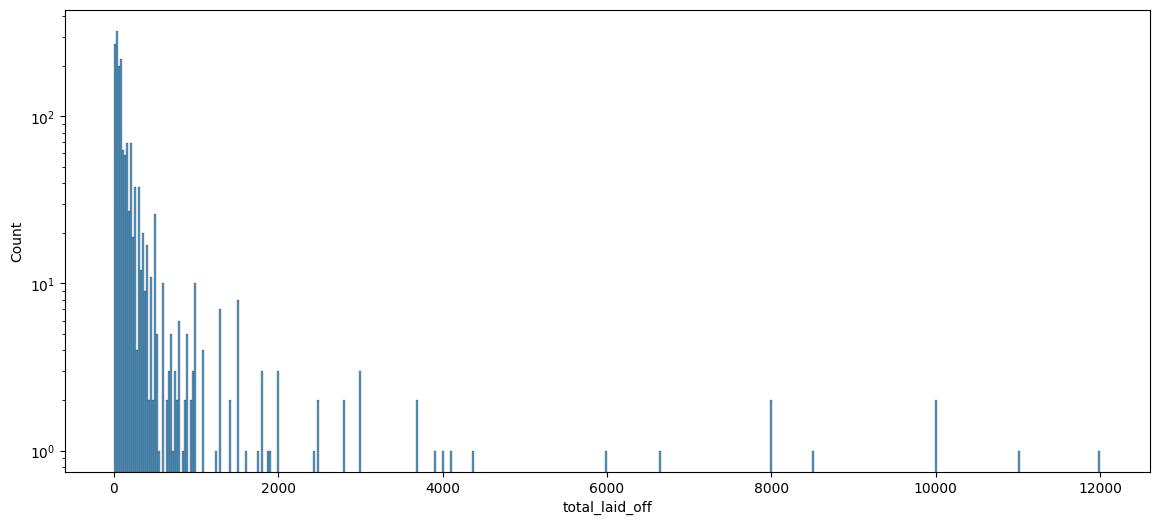

In [7]:
plt.figure(figsize=(14,6))
ax= sns.histplot(data=df, x='total_laid_off')
ax.set_yscale('log')
plt.show()

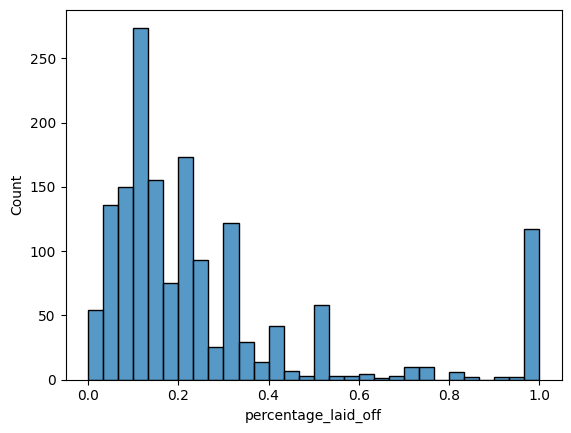

In [8]:
sns.histplot(data=df, x='percentage_laid_off')
plt.show()

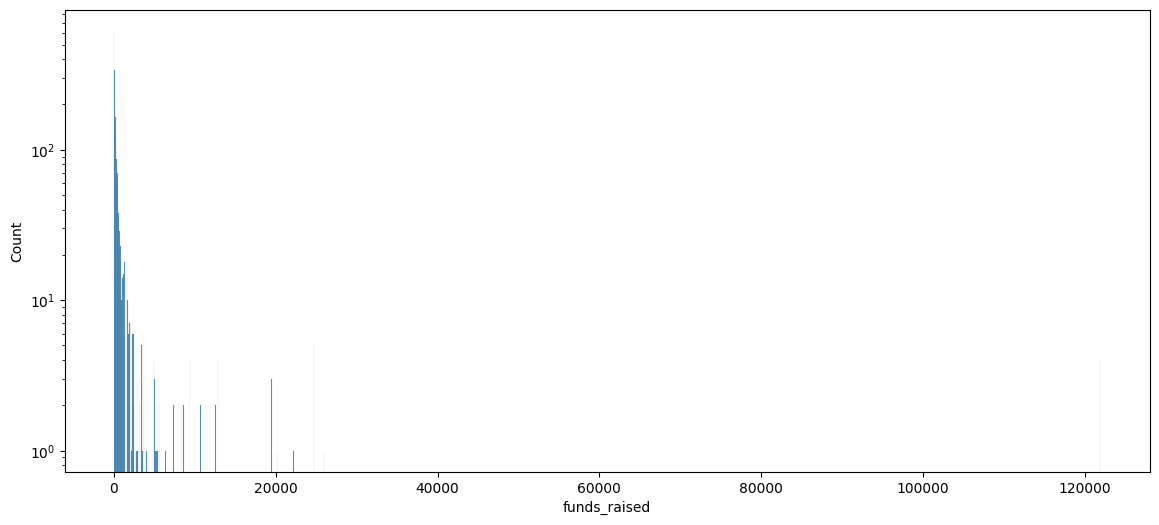

In [9]:
plt.figure(figsize=(14,6))
ax=sns.histplot(data=df, x='funds_raised')
ax.set_yscale('log')
plt.show()

##### <a id='toc1_1_2_6_2_'></a>[Với mỗi cột không có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?](#toc1_) [&#8593;](#toc0_)

In [10]:
cate_cols=['company', 'location', 'industry', 'stage', 'country']
cate_rows=["missing_ratio","num_diff_vals","diff_vals"]
data_cate={}
for col in cate_cols:
    row=[]
    row.append(round(df[col].isnull().sum()/len(df[col])*100,3))
    data_cate.update({f'{col}':row})

    row.append(len(df[col][df[col].isna()==False].unique()))
    row.append(np.array(df[col][df[col].isna()==False].unique()))
    data_cate.update({f'{col}':row})

cate_col_df=pd.DataFrame(data_cate,index=cate_rows)
display(cate_col_df)

,company,location,industry,stage,country
missing_ratio,0.0,0.0,0.042,0.255,0.0
num_diff_vals,1893,191,29,16,59
diff_vals,"[Atlassian, SiriusXM, Alerzo, UpGrad, Loft, Em...","[Sydney, New York City, Ibadan, Mumbai, Sao Pa...","[Other, Media, Retail, Education, Real Estate,...","[Post-IPO, Series B, Unknown, Acquired, Series...","[Australia, United States, Nigeria, India, Bra..."


>> Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2357 non-null   object 
 1   location             2357 non-null   object 
 2   industry             2356 non-null   object 
 3   total_laid_off       1618 non-null   float64
 4   percentage_laid_off  1573 non-null   float64
 5   date                 2356 non-null   object 
 6   stage                2351 non-null   object 
 7   country              2357 non-null   object 
 8   funds_raised         2148 non-null   float64
dtypes: float64(3), object(6)
memory usage: 165.9+ KB


Quan sát thấy có số lượng lớn dữ liệu bị thiếu và có những cột phải xử lý kiểu dữ liệu do vậy ta phải tiền xử lý dữ liệu.

#### <a id='toc1_1_2_7_'></a>[Tiền xử lý dữ liệu](#toc0_)

Missing data:
industry                 1
total_laid_off         739
percentage_laid_off    784
date                     1
stage                    6
funds_raised           209
dtype: int64


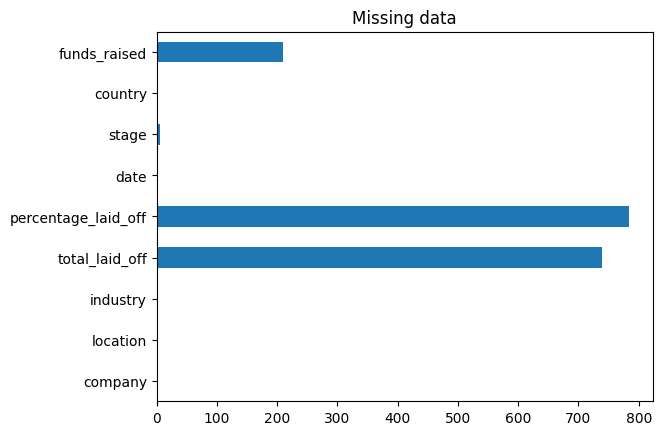

Percentage missing data:
industry                0.042427
total_laid_off         31.353415
percentage_laid_off    33.262622
date                    0.042427
stage                   0.254561
funds_raised            8.867204
dtype: float64
Number of rows duplicated: 1


In [12]:
# Kiểm tra missing data
have_Nan=df.columns[df.isna().any()]

# Đếm số missing data của các cột có missing data
print("Missing data:")
print(df[have_Nan].isnull().sum())
df.isna().sum().plot(kind="barh",title='Missing data')
plt.show()

# Phần trăm dữ liệu bị thiểu của những cột này
print("Percentage missing data:")
percentage_missing_data=df[have_Nan].isnull().sum() * 100 / df.shape[0]
print(percentage_missing_data)

# Kiểm tra có dữ liệu bị duplicate không
print("Number of rows duplicated: "+str(df[df.duplicated()].shape[0]))


Ta thấy có một số lượng khá lớn dữ liệu bị thiếu ở cột `total_laid_off`,`percentage_laid_off` và `funds_raised` . Vì có những cột dữ liệu bị thiếu lên đến hơn 30% nên ta không thể chọn phương án bỏ toàn bộ những dòng nào bị thiếu dữ liệu. Bên cạnh đó có tồn tại 1 dòng bị trùng ta cũng cần phải xử lý. 

- Đầu tiên ta loại bỏ những dòng có dữ liệu bị thiếu ở cột `industry`,`date` và `stage` vì số lượng bị thiếu không đáng kể.
- Xóa dòng bị trùng dữ liệu.
- Loại bỏ những dòng mà bị thiếu cả hai trường quan trọng là `total_laid_off` và `percentage_laid_off` vì những dòng này không có ý nghĩa để ta phân tích.
- Tiếp theo tùy theo hướng phân tích ta sẽ chọn những cột dữ liệu phù hợp. tạm thời ta sẽ fill bằng 0.

In [13]:
# Loại bỏ những dòng có dữ liệu bị thiếu ở cột `industry`,`date` và `stage`
df = df[~df['industry'].isna()]
df = df[~df['date'].isna()]
df = df[~df['stage'].isna()]

# Xóa dòng bị trùng dữ liệu.
df = df[~df.duplicated()]

# Loại bỏ những dòng mà bị thiểu cả hai trường quan trọng là `total_laid_off` và `percentage_laid_off`
df = df[~(df['total_laid_off'].isna()&df['percentage_laid_off'].isna())]

# 
df = df.fillna(0)
print("After fill null:")
print(df.isna().sum())

After fill null:
company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64


Sau khi đã tạm thời xử lý các dữ liệu bị thiếu ta bắt đầu xử lý kiễu dữ liệu của các cột.

- Chuyển data type của cột `date` sang dạng `datetime`.
- Chuyển data type của các cột đang là dạng `object ('str')` sang dạng `category`

In [14]:
# Chuyển data type của cột `date` sang dạng `datetime`.
df['date']=pd.to_datetime(df['date'])
# Chuyển data type của các cột đang là dạng `object` sang dạng `category`
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              1988 non-null   category      
 1   location             1988 non-null   category      
 2   industry             1988 non-null   category      
 3   total_laid_off       1988 non-null   float64       
 4   percentage_laid_off  1988 non-null   float64       
 5   date                 1988 non-null   datetime64[ns]
 6   stage                1988 non-null   category      
 7   country              1988 non-null   category      
 8   funds_raised         1988 non-null   float64       
dtypes: category(5), datetime64[ns](1), float64(3)
memory usage: 178.3 KB


Đã xữ lý xong kiểu dữ liệu của các cột. Giờ ta quan sát đến giá trị dữ liệu bên trong các cột.

In [15]:
# Sắp xếp df theo tên company để quan sát cột `company`
print(df.sort_values('company')['company'].unique())
a=df['company'].unique()
b=df['company'].str.upper().unique()
print(a.shape[0])
print(b.shape[0])

[' Included Health', '#Paid', '&Open', '100 Thieves', '10X Genomics', ..., 'iFood', 'iPrice Group', 'iRobot', 'nCino', 'uShip']
Length: 1629
Categories (1629, object): [' Included Health', '#Paid', '&Open', '100 Thieves', ..., 'iPrice Group', 'iRobot', 'nCino', 'uShip']
1629
1624


Số lượng tên công ty:

-   Data gốc: 1629
-   Data sau khi đưa tất cả về uppercase: 1624

Ta thấy có sự khác nhau về số lượng tên công ty khi ta giữ nguyên data gốc và sau khi đưa tất cả về uppercase -> Có những tên của cùng một công ty nhưng chưa được chuẩn hóa cùng 1 quy tắc.
-> Đưa tất cả về 1 loại (uppercase) và ta cũng phải xóa các khoảng trắng thừa trong tên công ty phòng trường hợp có tên công ty bị thừa khoảng trắng.

In [16]:
# Xử lý dữ liệu cột `company`
df['company']=df['company'].str.upper()
df['company']=df['company'].str.split().str.join(" ")
df['company'].unique().shape[0]

1621

Xử lý tương tự cho cột `location`, `industry`, `stage` và `country`.

In [17]:
# Xử lý dữ liệu cột `location`
df['location']=df['location'].str.upper()
df['location']=df['location'].str.split().str.join(" ")
df['location'].unique().shape[0]

166

In [18]:
# Xử lý dữ liệu cột `industry`
df['industry']=df['industry'].str.upper()
df['industry']=df['industry'].str.split().str.join(" ")
df['industry'].unique().shape[0]

29

In [19]:
# Xử lý dữ liệu cột `stage`
df['stage']=df['stage'].str.upper()
df['stage']=df['stage'].str.split().str.join(" ")
df['stage'].unique().shape[0]

16

In [20]:
# Xử lý dữ liệu cột `country`
df['country']=df['country'].str.upper()
df['country']=df['country'].str.split().str.join(" ")
df['country'].unique().shape[0]

51

Tiếp theo ta kiểm tra những cột có kiễu dữ liệu là số để xem có xuất hiện dữ liệu không hợp lệ không.
- Có dòng nào chứa số âm không?
- `percentage_laid_off` có giá trị nào lớn hơn 1 không?

In [21]:
# Kiểu tra giá trị âm
print("Negative total_laid_off: "+str(sum(df.total_laid_off<0)))
print("Negative percentage_laid_off: "+str(sum(df.percentage_laid_off<0)))
print("Negative funds_raised: "+str(sum(df.funds_raised<0)))

# Kiểm tra giá trị `percentage_laid_off` không hợp lệ
print("percentage_laid_off greater than 1: "+str(sum(df.percentage_laid_off>1)))

Negative total_laid_off: 0
Negative percentage_laid_off: 0
Negative funds_raised: 0
percentage_laid_off greater than 1: 0


Sau khi đã xử lý xong tất cả ta sắp xếp và reset index của data.

In [22]:
df=df.sort_values('company')
df=df.reset_index(drop=True)
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,#PAID,TORONTO,MARKETING,19.0,0.17,2023-01-27,SERIES B,CANADA,21.0
1,&OPEN,DUBLIN,MARKETING,9.0,0.09,2022-11-17,SERIES A,IRELAND,35.0
2,100 THIEVES,LOS ANGELES,CONSUMER,12.0,0.00,2022-07-13,SERIES C,UNITED STATES,120.0
3,10X GENOMICS,SF BAY AREA,HEALTHCARE,100.0,0.08,2022-08-04,POST-IPO,UNITED STATES,242.0
4,1STDIBS,NEW YORK CITY,RETAIL,70.0,0.17,2020-04-02,SERIES D,UNITED STATES,253.0


### <a id='toc1_1_3_'></a>[Thêm cột total_employee để phục phụ phân tích sau này](#toc0_)

In [23]:
df_with_total_employees=df.sort_values(by='total_laid_off',ascending=False)
df_with_total_employees=df_with_total_employees.reset_index(drop=True)
df_with_total_employees=df_with_total_employees[df_with_total_employees['percentage_laid_off']>0]
df_with_total_employees['total_employees']=round(df_with_total_employees['total_laid_off']/df_with_total_employees['percentage_laid_off'])
df_with_total_employees=df_with_total_employees[df_with_total_employees['total_employees']>0]
df_with_total_employees=df_with_total_employees.sort_values(by='total_employees',ascending=False)
df_with_total_employees=df_with_total_employees.reset_index(drop=True)

In [24]:
df2=df_with_total_employees.groupby('company')['total_employees'].max()
df2.sort_values(ascending=False).head(10)

company
AMAZON        400000.0
GOOGLE        200000.0
MICROSOFT     200000.0
IBM           195000.0
DELL          133000.0
ERICSSON      106250.0
SAP           100000.0
SALESFORCE    100000.0
META           84615.0
CISCO          82000.0
Name: total_employees, dtype: float64

### <a id='toc1_1_4_'></a>[<span style="color:yellow"> C. Khám phá mối quan hệ trong dữ liệu</span>](#toc0_)

#### <a id='toc1_1_4_1_'></a>[Tìm hiểu mối liên hệ giữa Stage và Percentage_laid_off:](#toc0_)

In [25]:
df_clean_percentage=df[df['percentage_laid_off']>0]
df_clean_percentage['percentage_laid_off']=df_clean_percentage['percentage_laid_off']*100
df_clean_percentage['percentage_lo_range']=pd.cut(x=df_clean_percentage['percentage_laid_off'], bins=[0, 10, 20, 30,
                                          40,50,60,70,80,90,100],labels=['0-10', '10-20', '20-30',
                                          '30-40','40-50','50-60','60-70','70-80','80-90','90-100'],include_lowest=True)

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\695514574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_percentage['percentage_laid_off']=df_clean_percentage['percentage_laid_off']*100
C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\695514574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_percentage['percentage_lo_range']=pd.cut(x=df_clean_percentage['percentage_laid_off'], bins=[0, 10, 20, 30,


In [26]:
df_clean_percentage['stage']=df_clean_percentage['stage'].sort_values()
table = pd.pivot_table(df_clean_percentage, values='percentage_laid_off', index='percentage_lo_range',columns='stage', aggfunc='count')
table=table.sort_values(by=['percentage_lo_range'],ascending=False)


C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3550499476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_percentage['stage']=df_clean_percentage['stage'].sort_values()


C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\4056499833.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_clean_percentage['stage'].unique(),rotation=90)


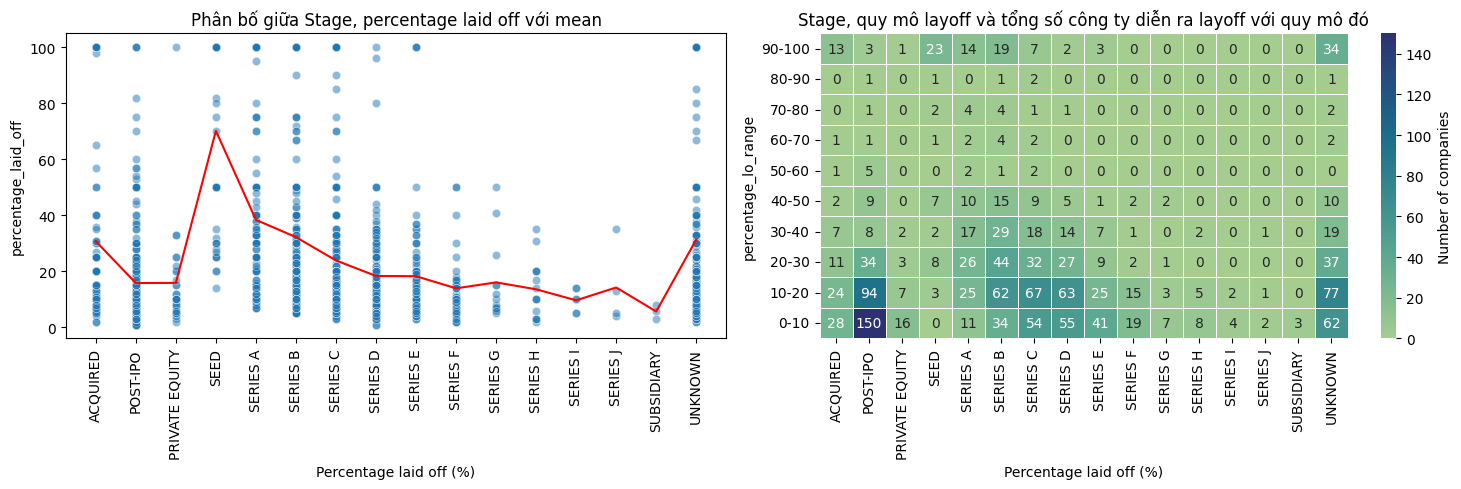

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5), tight_layout=True)

df_clean_percentage=df_clean_percentage.sort_values('stage',ascending=True)
# fig.tight_layout(pad=5.0)
ax1.set_xlabel('Percentage laid off (%)')

ax1.set_title('Phân bố giữa Stage, percentage laid off với mean',wrap=True)
ax1.set_xticklabels(df_clean_percentage['stage'].unique(),rotation=90)

sns.scatterplot(x='stage', y='percentage_laid_off',data=df_clean_percentage, ax=ax1,alpha=0.5)

sns.lineplot(x='stage', y='percentage_laid_off',data=df_clean_percentage,ax=ax1,color='red',errorbar=None)


sns.heatmap(table, annot=True, fmt="d", linewidths=.5, ax=ax2,cmap="crest",cbar_kws={'label': 'Number of companies'})
ax2.set_title('Stage, quy mô layoff và tổng số công ty diễn ra layoff với quy mô đó',wrap=True)
ax2.set_xlabel('Percentage laid off (%)')
plt.show()

Một vài điểm đáng chú ý:
- Nhìn vào biểu đồ scatter và heatmap ta có thể thấy dữ liệu phân bố chủ yếu ở mức sa thải dưới 20% nhân sự mỗi đợt. 
- Nhìn và heat map ta thấy tương đồng nhiều nhất là 150 công ty ở stage `Post-IPO` có xu hướng sa thải >10% nhân sự.
- Nhìn vào mean line, các công ty có `stage` là `Seed` sa thải % nhân sự rất cao và không bao giờ sa thải dưới 10% nhân sự.
- Dữ liệu chủ yếu tập trung ở nhóm các công ty có stage từ `Series A` đến `Series E`. Nhóm này có xu hướng sa thải trung bình 10-20% mỗi đợt.
- Các công ty stage từ `Series F` đến `Series J` và `Subdiary` có rất ít dữ liệu sa thải và không bao giờ sa thải hơn 50% nhân sự trong một đợt. Có thể lý giải đây là các giai đoạn gọi vốn sau khi đã khá ổn định của các công ty nên ít diễn ra sa thải. Các công ty thuộc `Subdiary` thì có công ty mẹ chống lưng nên tình trạng cũng tương đối ổn định.

### <a id='toc1_1_5_'></a>[Stage nào có tổng số laid off cao nhất:](#toc0_)

In [28]:
stage_df = df.groupby('stage').sum().reset_index()

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\637644651.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stage_df = df.groupby('stage').sum().reset_index()


In [29]:
px.pie(stage_df,names='stage',values='total_laid_off',
      color_discrete_sequence=px.colors.sequential.thermal,
       title='Tổng số laid off của từng stage (theo tỷ lệ %)')

Từ biểu đồ tổng số laid off của từng stage ta có thể thấy:
- Stage POST-IPO chiếm 53.2% tổng số lượng laid off, chiếm hơn 1/2 tổng số laid off của tất cả các công ty.
- POST-IPO cũng chính là Stage có tổng số laid off cao nhất.

### <a id='toc1_1_6_'></a>[Tổng số lượng nhân viên bị sa thải của các ngành công nghiệp khác nhau theo từng năm:](#toc0_)

In [30]:
df_tmp = df.reset_index()
df_tmp['date'] = pd.to_datetime(df_tmp['date'])
df_industry = df_tmp.groupby([ df.industry, df.date.dt.year]).sum()
df_industry = df_industry.reset_index()

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\2048079931.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: title={'center': 'Tổng số lượng sa thải của các ngành công nghiệp khác nhau trong từng năm'}, xlabel='industry', ylabel='total_laid_off'>

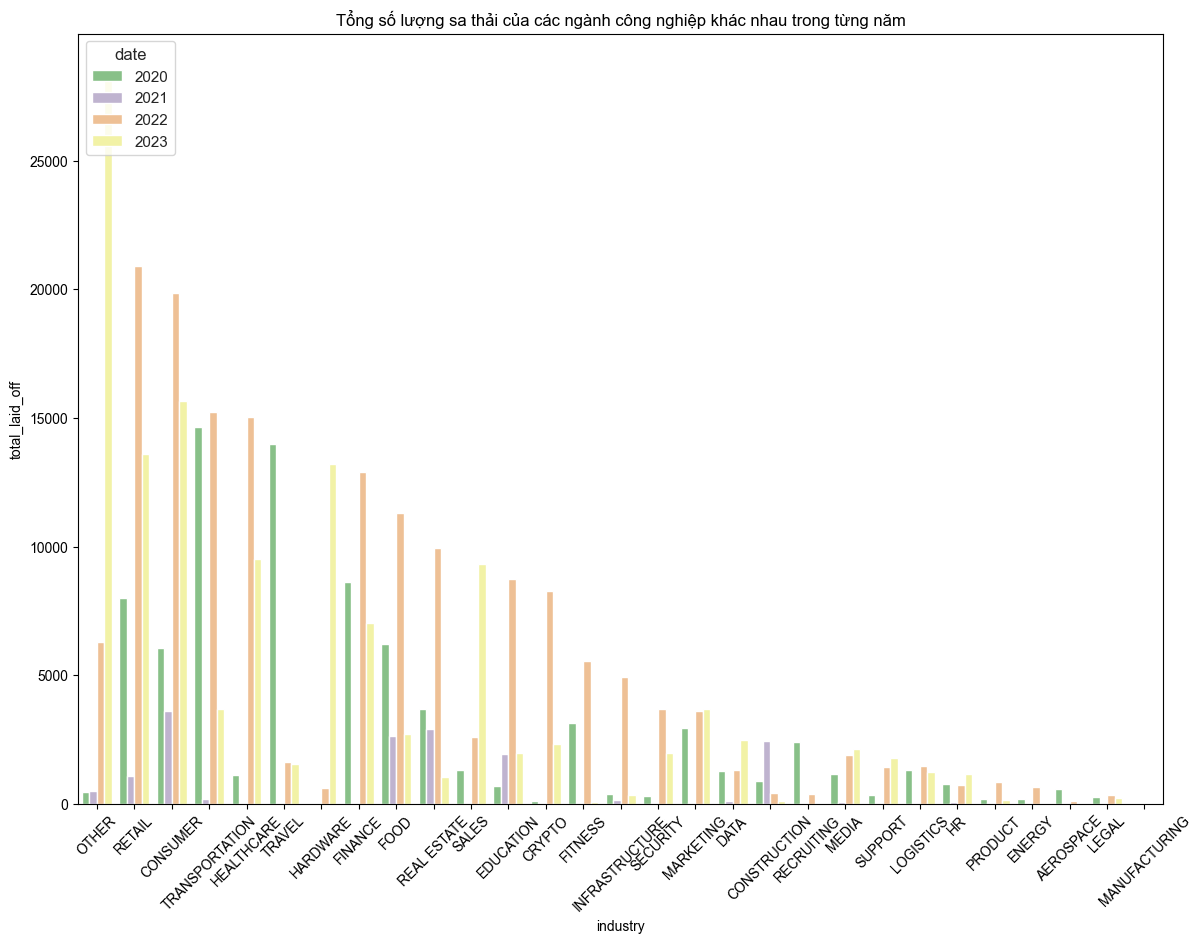

In [31]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=45)
plt.title("Tổng số lượng sa thải của các ngành công nghiệp khác nhau trong từng năm")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

Xu hướng sa thải hằng năm của thế giới cho thấy rằng:
- Việc xa thải cao hơn vào năm 2020, sau đó giảm và năm 2021 và tăng vọt vào năm 2021.
- Vào năm 2020, các ngành công nghiệp Transportation (vận tải) và Travel (du lịch) đã bị ảnh hưởng nhiều nhất bởi dịch COVID-19. Điều đó được thể hiện thông qua số lượng sa thải vào năm 2020. Nhưng 2 ngành này đã phục hồi vào những năm sau đó.
- Các ngành công nghiệp Retail (bán lẻ), Consumer (tiêu dùng) và Food (thực phẩm) đã phải đối mặt với việc sa thải gia tăng mạnh mẽ qua các năm.

### <a id='toc1_1_7_'></a>[Theo từng năm, quốc gia có tổng số lượng sa thải lớn nhất:](#toc0_)

In [32]:
df_tmp['year'] = df_tmp['date'].dt.year
layoff_year_country = df_tmp.groupby(['year','country']).sum().reset_index()[['year','country','total_laid_off']]

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\2947083729.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [33]:
layoff_year_country = layoff_year_country.sort_values(["year","total_laid_off"],ascending=False)

In [34]:
px.bar(layoff_year_country,x='year',y='total_laid_off',color='country',text='country',
      title='Tổng lượng sa thải của từng năm theo quốc gia'
      )

Từ biểu đồ trên ta thấy:
- Tổng số lượng sa thải giảm trong giai đoạn từ 2020 sang 2021. Nhưng sau đó lại tăng mạnh vào giai đoạn 2022.
- Với tất cả các năm 2020, 2021, 2022, 2023 thì United States luôn là quốc gia có số lượng sa thải lớn nhất. Thường chiếm gần 1/2 tổng số lượng sa thải của tất cả các quốc gia.

### <a id='toc1_1_8_'></a>[Mối quan hệ giữa total layoffs và funds raised của các công ty:](#toc0_)

In [35]:
funds_raised = df[(df.funds_raised<40000)][['total_laid_off', 'funds_raised']]

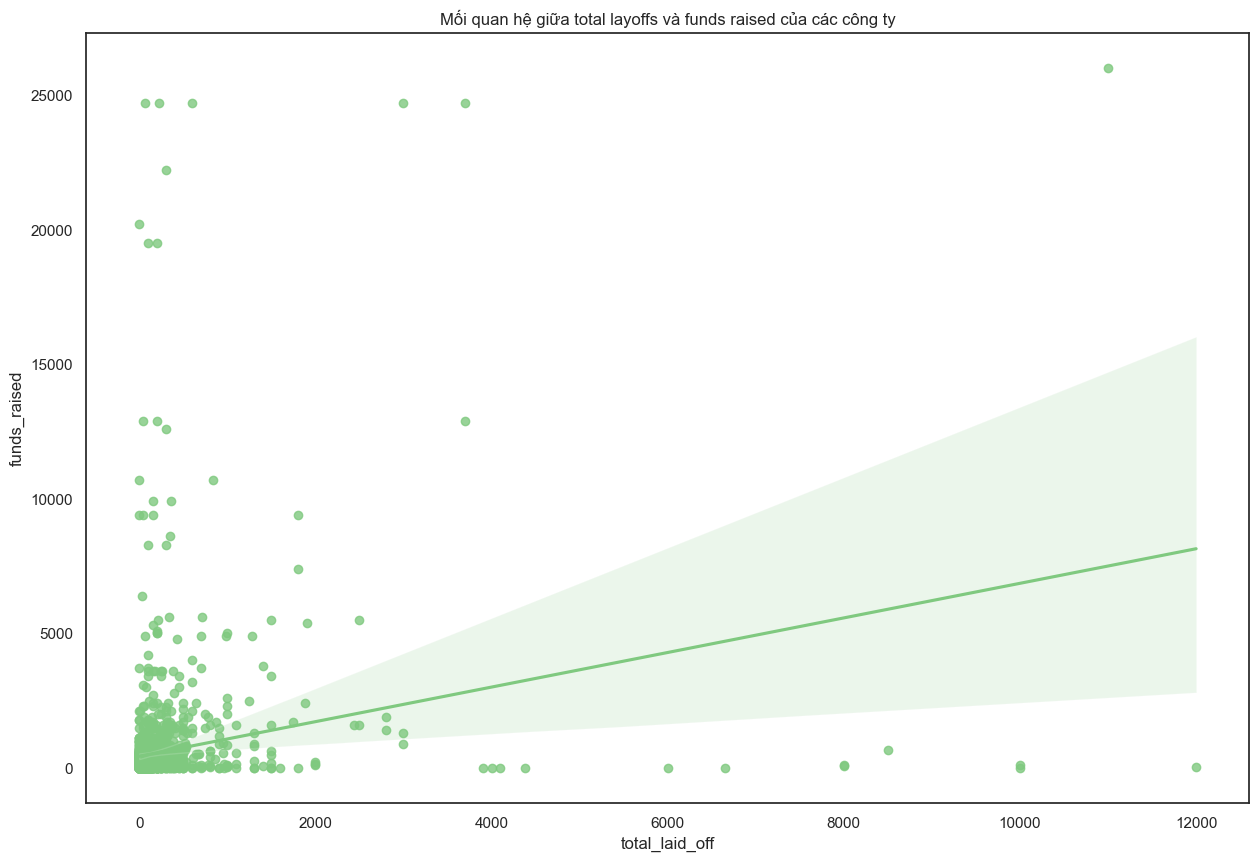

In [36]:
fig = plt.figure(figsize=(15,10))
sns.regplot(data=df, x=funds_raised.total_laid_off, y=funds_raised.funds_raised)
plt.title("Mối quan hệ giữa total layoffs và funds raised của các công ty")
plt.show()

Dựa vào biểu đồ Mối quan hệ của total laidoffs và funds raised:
- Đa số các công ty có số funds raised vừa và ít thì cũng có total laidoffs vừa và thấp.
- Những công ty có total laidoff cao, thậm chí là rất cao có funds raised rất thấp (gần bằng 0).
- Ngược lại, những công ty có funds raised cao thì thường sẽ có total laidoff thấp.

### <a id='toc1_1_9_'></a>[Số lượng sa thải trên thế giới giai đoạn 2020 - 2023](#toc0_)

In [37]:
# group the data by country and industry and sum the total_laid_off column
grouped = df.groupby(['country']).agg({'total_laid_off': 'sum'}).reset_index()
# create a choropleth map using Plotly
fig = px.choropleth(grouped, locations='country', locationmode='country names', color='total_laid_off',
                    # color_continuous_scale='OrRd',
                    color_continuous_scale='YlOrRd',
                    hover_name='country', projection='natural earth', title='Number of People Laid Off by Country')

# show the map
fig.show()

Biểu đồ trên thể hiện tình hình người bị sa thải cụ thể ở các đất nước trên thế giới. Cụ thể:
- Đất nước đang đứng dưới nguy cơ lớn về việc chuyển đổi nhân sự là Mỹ với thống kê khoảng 250.000 người mất việc.
- Các đất nước khác thì có tỉ lệ ít đáng kể so với Mỹ, như với Ấn Độ với khoảng 35.953 người mất việc, Brazil 10.391 người, Canada 6.319 người, các đất nước còn lại với con số không đáng kể.

*Vì số lượng ngành nghề khá nhiều để visualize, nên ta sẽ nhóm các ngành nghề thành các nhóm ngành*

In [38]:
# Mapping industries into groups
industry_to_sector = {
    'CRYPTO': 'Technology',
    'DATA': 'Technology',
    'HARDWARE': 'Technology',
    'SOFTWARE': 'Technology',
    'HEALTHCARE': 'Healthcare',
    'FITNESS': 'Healthcare',
    'RETAIL': 'Retail',
    'FOOD': 'Retail',
    'FINANCE': 'Finance',
    'EDUCATION': 'Education',
    'MEDIA': 'Media',
    'TRANSPORTATION': 'Transportation and Logistics',
    'LOGISTICS': 'Transportation and Logistics',
    'INFRASTRUCTURE': 'Other',
    'PRODUCT': 'Other',
    'CONSTRUCTION': 'Other',
    'OTHER': 'Other',
    'LEGAL': 'Other',
    'REAL ESTATE': 'Other',
    'HR': 'Other',
    'RECRUITING': 'Other',
    'SALES': 'Sales',
    'AEROSPACE': 'Other',
    'SECURITY': 'Other'
}

### <a id='toc1_1_10_'></a>[Tình hình sa thải trong các ngành ở các quốc gia](#toc0_)

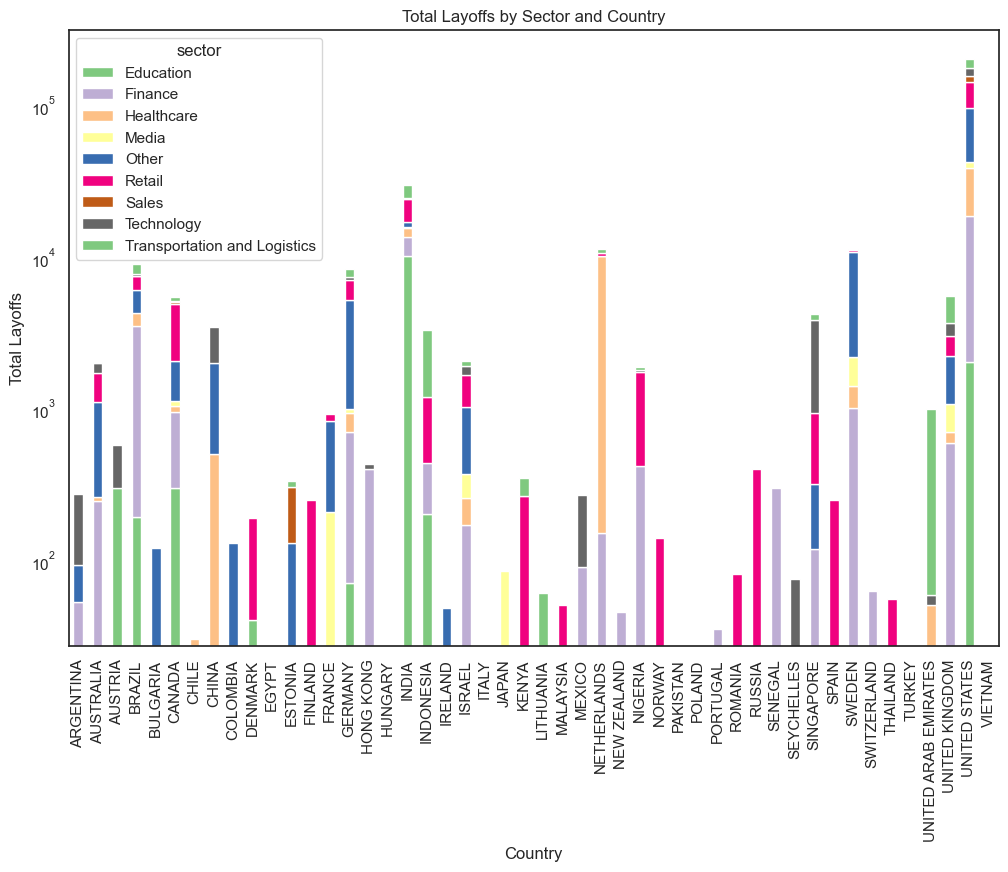

In [39]:
df_sub=df.copy()
df_sub['sector'] = df_sub['industry'].map(industry_to_sector)

# Group the data by country and industry and calculate the total number of layoffs
grouped = df_sub.groupby(['country', 'sector'])['total_laid_off'].sum()

# Reshape the data to create a pivot table with countries as rows, industries as columns, and total layoffs as values
pivoted = grouped.reset_index().pivot(index='country', columns='sector', values='total_laid_off')

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
pivoted.plot(kind='bar', stacked=True, ax=ax)

# Set the y-axis scale to a log scale
ax.set_yscale('log')

# Set the title and axis labels
plt.title('Total Layoffs by Sector and Country')
plt.xlabel('Country')
plt.ylabel('Total Layoffs')

# Show the plot
plt.show()

Nhóm các ngành nghề có liên quan thành các lĩnh vực: **Technology, Healthcare, Retail, Finance, Education, Media, Transportation and Logistics, Other, Sales**.\
Biểu diễn bằng biểu đồ cột chồng cho thấy tỉ lệ các lĩnh vực xuất hiện sa thải ở từng quốc gia, *biểu thị đầy đủ về các lĩnh vực* đang được tác động trong một đất nước như thế nào.\
Các yếu tố đáng chú ý về tỷ lệ sa thải có thể bao gồm:
- Ấn Độ là quốc gia gặp phải vấn đề sa thải nghiêm trọng nhất liên quan đến giáo dục.
- Netherlands chỉ gặp vấn đề ở 2 lĩnh vực chính là Healthcare và Finance.
- Lĩnh vực Finance có nguy cơ bị sa thải cao nhất và bị ảnh hưởng tại hầu hết các quốc gia.

### <a id='toc1_1_11_'></a>[Các quốc gia đang dẫn đầu trong làn sóng sa thải ở từng lĩnh vực](#toc0_)

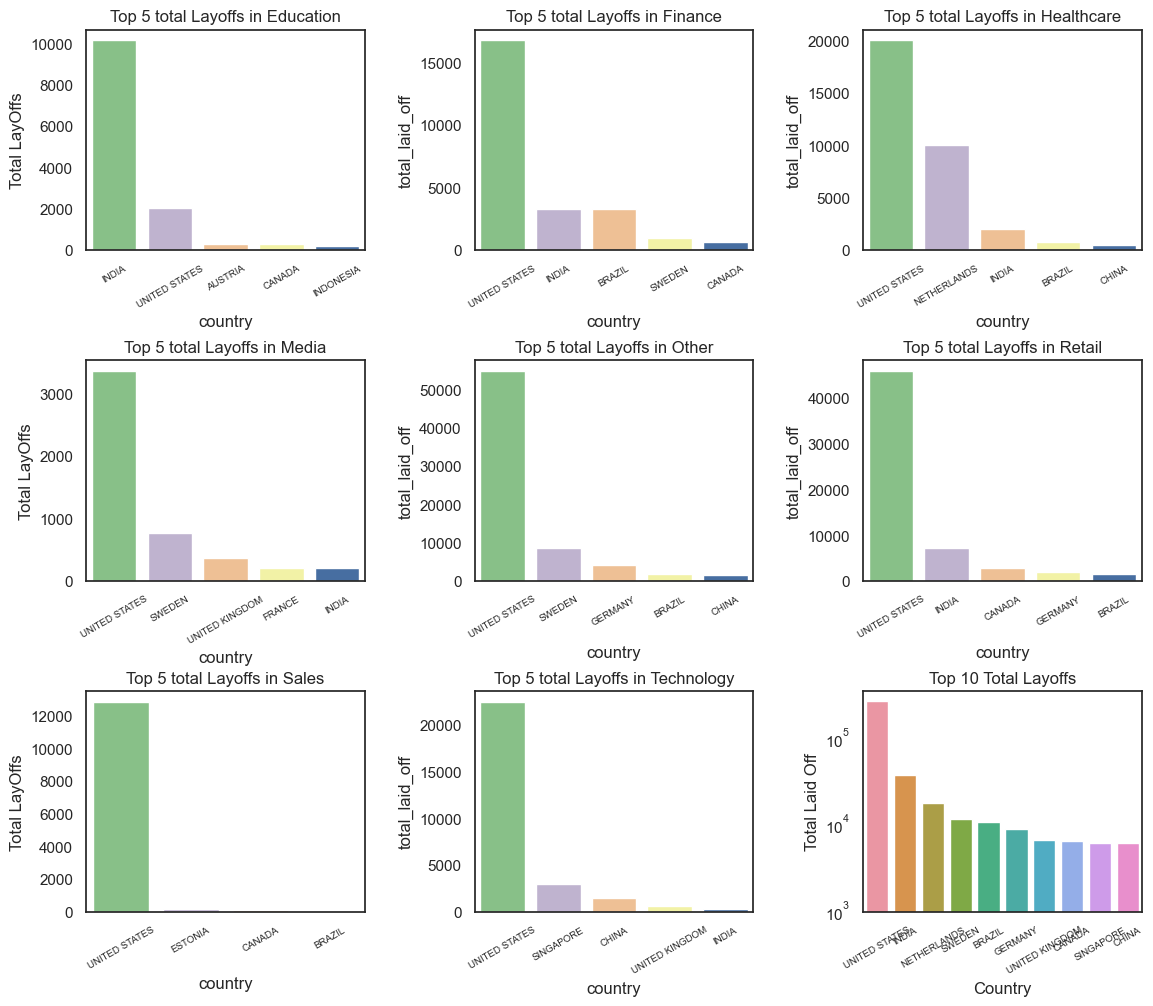

In [40]:
# Map industries to sectors in the DataFrame
df['sector'] = df['industry'].map(industry_to_sector)

# Group the data by sector and country
grouped = df.groupby(['sector', 'country'])['total_laid_off'].sum().reset_index()


fig= plt.figure(figsize=(12,13))
# Loop through the sectors and create a bar chart for each one
for index, sector in enumerate(grouped['sector'].unique()):

    # Filter the data for the current sector
    sector_data = grouped[grouped['sector'] == sector]
    
    # Sort the data by total layoffs for each country in the sector
    sorted_data = sector_data.sort_values('total_laid_off', ascending=False)
    
    # Filter to include only the top 5 countries
    top_5 = sorted_data.head(5)
    
    # Create the bar chart
    ax = fig.add_subplot(4,3,index+1)
    ax = sns.barplot(data=top_5,
                     x= "country",
                     y='total_laid_off')
    # ax.bar(top_5['country'], top_5['total_laid_off'])
    ax.set_title(f'Top 5 total Layoffs in {sector}')
    if index % 3 ==0 : ax.set_ylabel('Total LayOffs')
    ax.tick_params(axis='x')
    plt.xticks(fontsize=7,rotation=30)


top_n_countries = 10
# create a chart that ranks countries based on their total layoffs in all industries
all_data = df.groupby('country')['total_laid_off'].sum().nlargest(top_n_countries)


# fig.subplots_adjust(left=0.1, bottom=0.2)
sns.barplot(data=all_data.to_frame().reset_index(),x="country", y ="total_laid_off")
# ax.bar(all_data.index, all_data.values)
ax.set_title(f'Top {top_n_countries} Total Layoffs')
ax.set_xlabel('Country')
ax.set_ylabel('Total Laid Off')
ax.set_yscale('log')

# add padding between subplots and adjust layout
plt.tight_layout(pad=2)
# add margin between rows
fig.subplots_adjust(hspace=0.5)
plt.show()

Từ những nhóm lĩnh vực mà ta đã chia, ta có các biểu đồ cột thể hiện những quốc gia với số lượng sa thải nhân viên ***đạt top đầu***.\
Dễ thấy Mỹ là quốc gia đứng đầu trong tất cả các bảng cho thấy tỉ lệ sa thải ở đất nước này là *đáng báo động*.\
Đặc biệt đáng quan tâm về tỉ lệ bị sa thải của trong các ngành công nghệ liên quan tới Sales, Retail, Technology.

Text(0.5, 1.0, 'Số lượng nhân viên bị cho nghỉ việc ở các quốc gia')

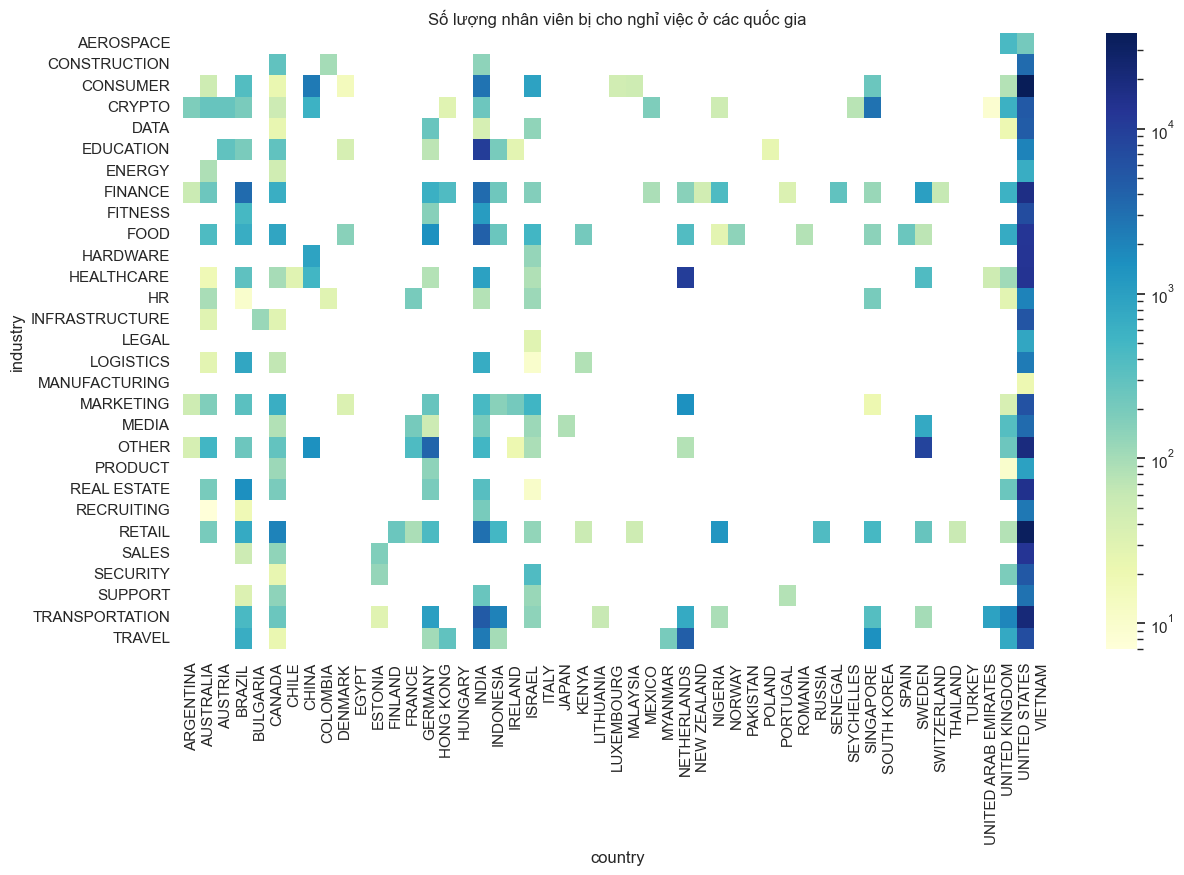

In [41]:
plt.figure(figsize=(14, 8))
pivot_df = pd.pivot_table(df, values='total_laid_off', columns=['country'], index=['industry'], aggfunc='sum')
# sns.heatmap(pivot_df, cmap='YlGnBu')

sns.heatmap(pivot_df, cmap='YlGnBu', norm=colors.LogNorm())
plt.title('Số lượng nhân viên bị cho nghỉ việc ở các quốc gia')

**Heat map** trực quan số lượng nhân viên bị cho nghỉ việc ở các quốc gia.\
Mỹ đứng đầu ở hầu hết mọi lĩnh vực.\
Tiếp đến là Ấn Độ với các ngành như: Consumer, Education, Food, Finance, Transportation.

#### <a id='toc1_1_11_1_'></a>[Ngành nào đang có số lượng layoff cao nhất trên thế giới](#toc0_)

<Axes: xlabel='industry', ylabel='total_laid_off'>

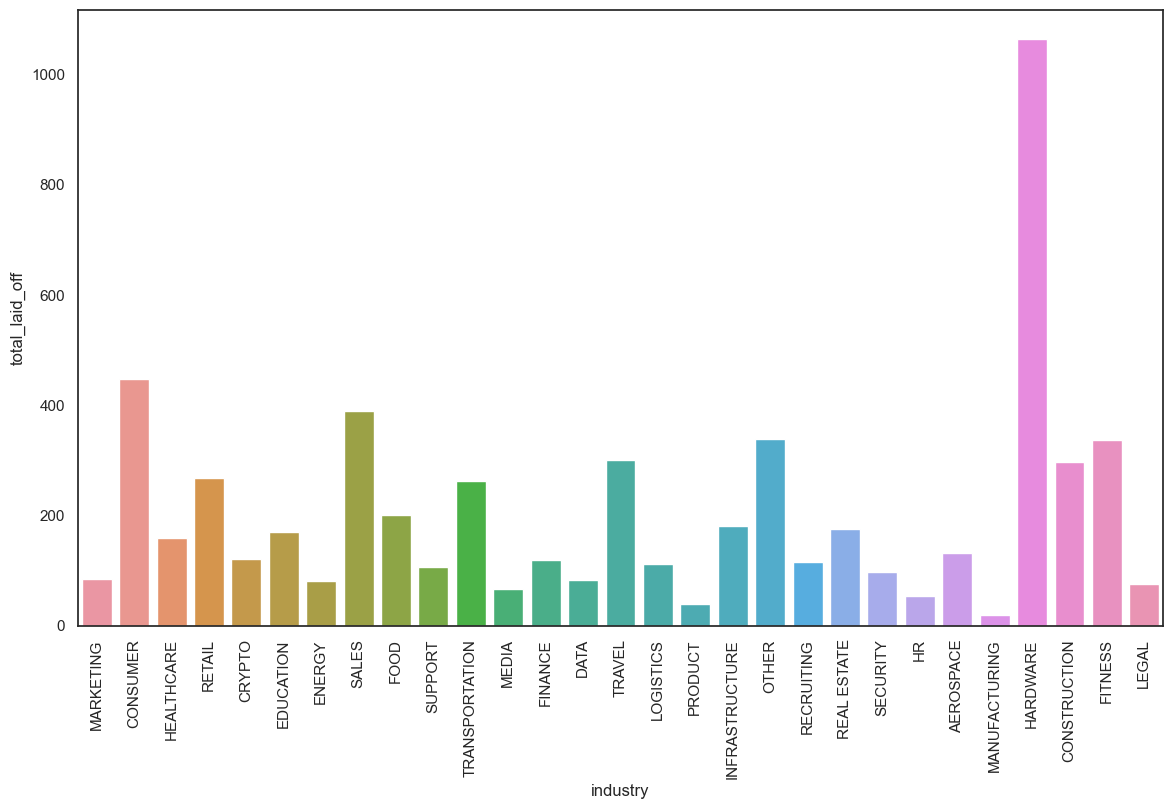

In [42]:
industry_grouped = df.groupby(["industry"])["total_laid_off"].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.xticks(rotation=90)
sns.barplot(df,x="industry",y="total_laid_off", errorbar=None)
# dùng industry_grouped mới đúng

Ở thời điểm hiện tại xét trên những mảng của các công ty công nghệ, nhận thấy là các công ty chuyên Hardware đang có lượng người bị sa thải nhiều nhất (gấp hơn 2 lần so với công ty đứng vị trí thứ 2).\
Một số nguyên nhân chính của nó là do: sự cạnh tranh, nhu cầu thị trường thay đổi, giảm thiểu chi phí bảo trì và sửa chữa bằng cách tạo ra các sản phẩm dễ dàng sửa chữa, tác động của đại dịch COVID-19.

#### <a id='toc1_1_11_2_'></a>[Xét tất cả các ngành, dùng biểu đồ cột thể hiện số lượng quốc gia có ngành nghề đó layoff top đầu / cuối. ](#toc0_)

Các bước thực hiện: Với mỗi industry ta sẽ tìm số lượng country laid off:
- Lọc ra các country
- Với mỗi country, đếm số lượng total_laid_off
- Nếu total_laid_off của country tương ứng khác 0 thì số lượng country laid off tăng lên 1
Sau khi đã có số lượng country laid off, ta trực quan bằng biểu đồ cột với trục x là industry và y là số lượng country laid off tương ứng với industry đó. (xem hình bên dưới)

Nhận xét:
- Industry có số lượng country laid off cao nhất là finance (số lượng: 242)
- Industry có số lượng country laid off thấp nhất là manufacturing (số lượng: 1)

industry max:            count
industry       
FINANCE     242 

industry min:                 count
industry            
MANUFACTURING      1 



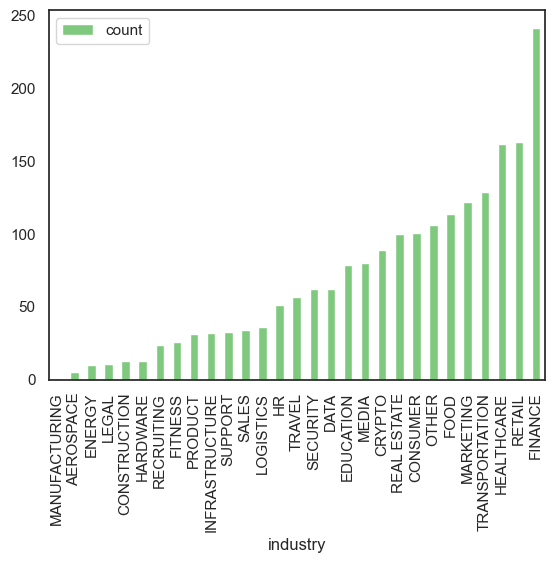

In [43]:
df_industry = df.groupby("industry")["country"].agg(["count"]).sort_values("count")
print("industry max: ",df_industry[df_industry["count"]==df_industry["count"].max()], "\n")
print("industry min: ",df_industry[df_industry["count"]==df_industry["count"].min()], "\n")

ax = df_industry.plot.bar()
ax.set_xlabel="industry"
ax.set_ylabel="total countries"
ax.set_title="Total laid off group by industry"


#### <a id='toc1_1_11_3_'></a>[Thêm total_employee để chọn ra top company theo quy mô nhân sự. Từ đây phát triễn các phân tích trên nhóm top company.](#toc0_)

<Axes: title={'center': 'Tổng nhân sự sa thải trong các tập đoàn lớn'}, xlabel='company', ylabel='total_laid_off'>

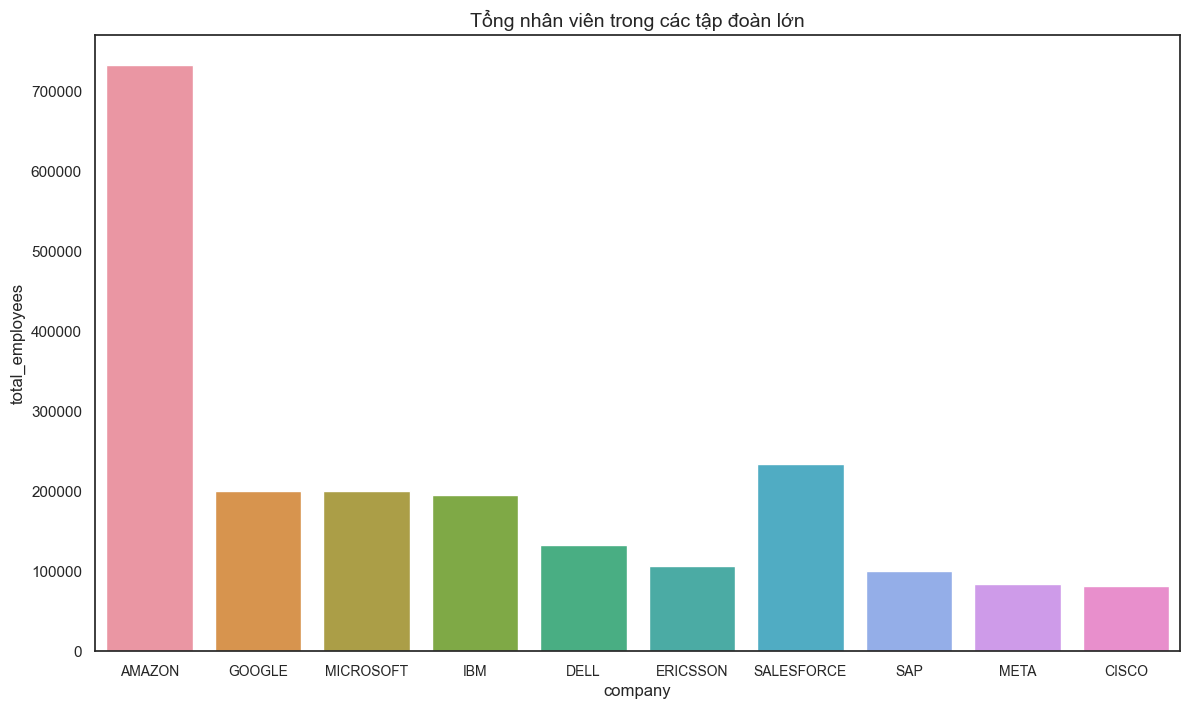

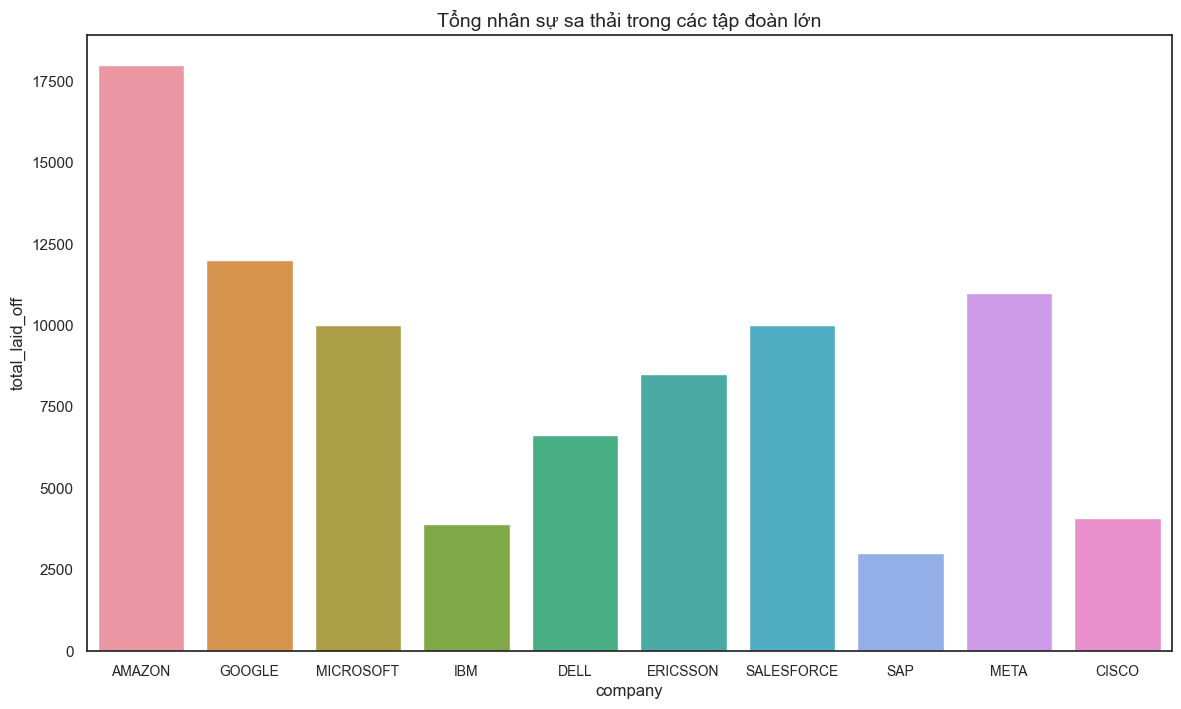

In [44]:
n=10

top_n_biggest_companies =list(df_with_total_employees.groupby("company")\
                                                .agg({"total_employees": "max"})\
                                                .sort_values("total_employees",ascending=False)[:n]\
                                                .index)


plt.figure(figsize=(14, 8))
plt.xticks(size=10)
plt.title("Tổng nhân viên trong các tập đoàn lớn",size=14)
sns.barplot(df_with_total_employees[df_with_total_employees['company'].isin(top_n_biggest_companies)],
            x="company",
            y="total_employees",
            errorbar=None,
            estimator="sum")


plt.figure(figsize=(14, 8))
plt.xticks(size=10)
plt.title("Tổng nhân sự sa thải trong các tập đoàn lớn",size=14)
sns.barplot(df_with_total_employees[df_with_total_employees['company'].isin(top_n_biggest_companies)],
            x="company",
            y="total_laid_off",
            errorbar=None,
            estimator="sum")

In [45]:
df_with_total_employees.describe()['total_laid_off']

count     1189.000000
mean       272.983179
std        883.553635
min          3.000000
25%         38.000000
50%         80.000000
75%        200.000000
max      12000.000000
Name: total_laid_off, dtype: float64

Trong top 10 công ty lớn, số lượng sa thải đạt thấp nhất là khoảng 2200 người. Nhận thấy được là các tập đoàn lớn có xu hướng sa thải nhân viên cao hơn mức bình quân của toàn bộ các công ty trong tập dữ liệu (272 người).

#### <a id='toc1_1_11_4_'></a>[Khám phá dữ liệu thực tế](#toc0_)

##### <a id='toc1_1_11_4_1_'></a>[Địa điểm tiêu biểu nơi xảy ra layoff](#toc0_)

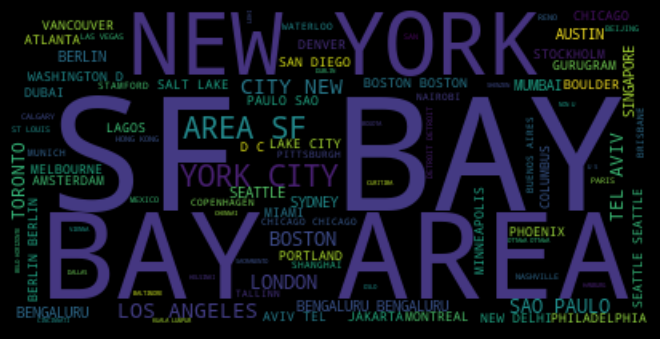

In [46]:

plt.figure(facecolor='k')
wordcloud = WordCloud(width=400, height=200,max_font_size=100).generate(' '.join(df['location']))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

San Francisco area bay với Silicon Valley nổi tiếng lại cũng là nơi diễn ra layoff nhiều nhất :(

##### <a id='toc1_1_11_4_2_'></a>[Số lượng layoff theo thời gian](#toc0_)

In [47]:
df_clean_total_lo=df[df['total_laid_off']>0]
df_clean_total_lo['date'].min()
df_clean_total_lo['date'].max()
df_clean_total_lo['month_year'] = pd.to_datetime(df_clean_total_lo['date']).dt.strftime('%Y-%m')
total_by_month_year = df_clean_total_lo.groupby('month_year').sum()['total_laid_off']
total_by_month_year.reindex(pd.period_range('2020-01',total_by_month_year.index[-1],freq='M'))
total_by_month_year.fillna(0.0)
total_by_month_year.max()

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\2454254869.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\2454254869.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



84424.0

In [48]:
df_total_employees_time=df_with_total_employees[df_with_total_employees.total_laid_off>0]
df_total_employees_time['year']=df_total_employees_time['date'].apply(lambda x :x.year)
df_total_employees_time['month']=df_total_employees_time['date'].apply(lambda x :x.month)
df_total_employees_time['month_year'] = pd.to_datetime(df_total_employees_time['date']).dt.strftime('%Y-%m')



C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\4222710485.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Số lượng lay off nhiều nhất trong 1 tháng: 77543.0 người


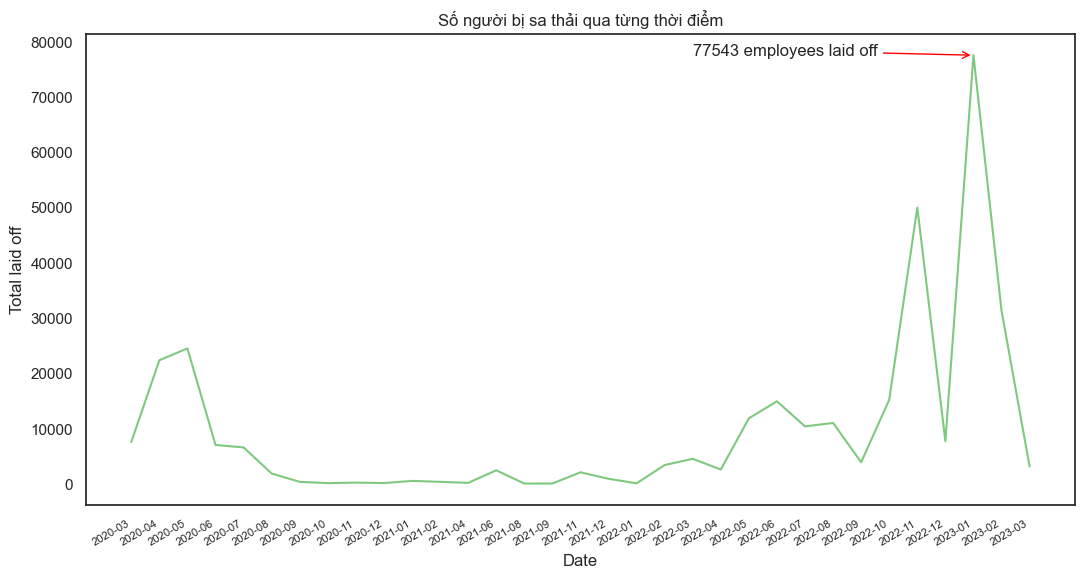

In [49]:
total_by_time=df_total_employees_time.groupby('month_year').sum()['total_laid_off']

fig, ax = plt.subplots( figsize=(12, 7), tight_layout=True)
fig.tight_layout(pad=5.0)
plt.plot(total_by_time.index,total_by_time.values)
plt.xlabel('Date')
plt.ylabel('Total laid off')
plt.title('Số người bị sa thải qua từng thời điểm')


x_max=np.where(total_by_time == total_by_time.max())[0]
y_max=total_by_time.max()
plt.annotate(f'{int(y_max)} employees laid off', xy=(x_max, y_max), xytext=(x_max-10, y_max),arrowprops=dict(arrowstyle='->',color='red'))

# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xticks(fontsize=8)


print(f"Số lượng lay off nhiều nhất trong 1 tháng: {y_max} người")

Làng sóng layoff diễn ra mạnh mẽ nhất từ tháng 9 2022 và đạt đỉnh vào tháng 1 2023 với tổng cộng gần 80 ngàn người bị sa thải trong 1 tháng.

##### <a id='toc1_1_11_4_3_'></a>[Số lượng layoff theo tháng](#toc0_)

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3600889002.py:4: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3600889002.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3600889002.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3600889002.py:5: FutureWarning:

The default

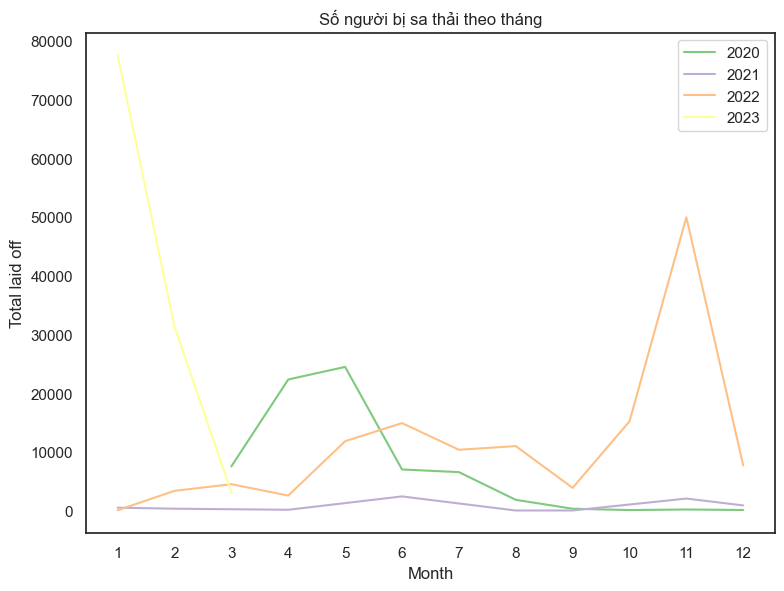

In [50]:

analysis_year = df_total_employees_time.groupby(["year"],sort=True)
fig, ax = plt.subplots( figsize=(9, 7), tight_layout=True)
fig.tight_layout(pad=5.0)
for year, dfx in analysis_year:
    df_m=dfx.groupby('month').sum()['total_laid_off']
    plt.plot(df_m.index,df_m.values,label=f'{year}')

plt.xticks(np.arange(1, 13, 1))
plt.xlabel('Month')    
plt.ylabel('Total laid off')   
plt.title('Số người bị sa thải theo tháng') 
plt.legend()


Tháng 11 và tháng 1 là hai thời điểm có nhiều người bị sa thải nhất. Nhìn rộng hơn thì quý 1 và quý 4 là những thời điểm có lượng sa thải lớn nhất.

## <a id='toc1_2_'></a>[Liệu có đợt layoff này diễn ra vào holiday week?](#toc0_)

*holiday week: Tuần lễ cuối cùng của năm gồm cả Christmas (25/12) và ngày đầu năm mới (01/01). Đây là dịp lễ lớn ở các nước phương tây.

In [51]:
df_time=df.set_index('date',drop=True)
holiday_laid_off_2021=df_time['2020-12-24':'2021-01-01']
holiday_laid_off_2022=df_time['2021-12-24':'2022-01-01']
holiday_laid_off_2023=df_time['2022-12-24':'2023-01-01']

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3784360912.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3784360912.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\3784360912.py:4: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [52]:
print(holiday_laid_off_2021)

Empty DataFrame
Columns: [company, location, industry, total_laid_off, percentage_laid_off, stage, country, funds_raised, sector]
Index: []


In [53]:
print(holiday_laid_off_2022)

Empty DataFrame
Columns: [company, location, industry, total_laid_off, percentage_laid_off, stage, country, funds_raised, sector]
Index: []


In [54]:
print(holiday_laid_off_2023)

                    company     location industry  total_laid_off  \
date                                                                
2022-12-27         BILIBILI     SHANGHAI    MEDIA             0.0   
2022-12-25          ELEMENT       LONDON    OTHER             0.0   
2022-12-27  OCTOPUS NETWORK  BEAU VALLON   CRYPTO             0.0   
2022-12-26             PAYU    AMSTERDAM  FINANCE           150.0   

            percentage_laid_off     stage         country  funds_raised  \
date                                                                      
2022-12-27                 0.30  POST-IPO           CHINA        3700.0   
2022-12-25                 0.15  SERIES B  UNITED KINGDOM          96.0   
2022-12-27                 0.40  SERIES A      SEYCHELLES           8.0   
2022-12-26                 0.06  ACQUIRED     NETHERLANDS           0.0   

                sector  
date                    
2022-12-27       Media  
2022-12-25       Other  
2022-12-27  Technology  
2022-12-2

Kết quả ta thấy cuối năm 2022 có 4 công ty cho một số lượng khá lớn nhân viên nghỉ khỏe ngay trong thời gian diễn ra trong holiday week 😥.

### <a id='toc1_2_1_'></a>[Tình hình layoff ở Việt Nam](#toc0_)

In [55]:
print(df[df.country=='VIETNAM'])

     company          location     industry  total_laid_off  \
1340  PROPZY  HO CHI MINH CITY  REAL ESTATE             0.0   
1341  PROPZY  HO CHI MINH CITY  REAL ESTATE             0.0   
1891   WEFIT             HANOI      FITNESS             0.0   

      percentage_laid_off       date     stage  country  funds_raised  \
1340                  0.5 2022-06-07  SERIES A  VIETNAM          33.0   
1341                  1.0 2022-09-13  SERIES A  VIETNAM          33.0   
1891                  1.0 2020-05-13      SEED  VIETNAM           1.0   

          sector  
1340       Other  
1341       Other  
1891  Healthcare  


Ta thấy có 3 đợt sa thải được ghi nhận tại Việt Nam đến từ 2 công ty.

### <a id='toc1_2_2_'></a>[Với mỗi đợt sa thải, các công ty thường cho nghỉ bao nhiêu phần trăm nhân sự?](#toc0_)

In [56]:
df_clean_percentage=df[df['percentage_laid_off']>0]
df_clean_percentage['percentage_laid_off']=df_clean_percentage['percentage_laid_off']*100
df_clean_percentage['percentage_lo_range']=pd.cut(x=df_clean_percentage['percentage_laid_off'], bins=[0, 10, 20, 30,
                                          40,50,60,70,80,90,100],labels=['0-10', '10-20', '20-30',
                                          '30-40','40-50','50-60','60-70','70-80','80-90','90-100'],include_lowest=True)

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\695514574.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\695514574.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'Số đợt sa thải theo quy mô phần trăm nhân sự mỗi đợt'}, xlabel='percentage laid off (%)', ylabel='Number of times laid off happend'>

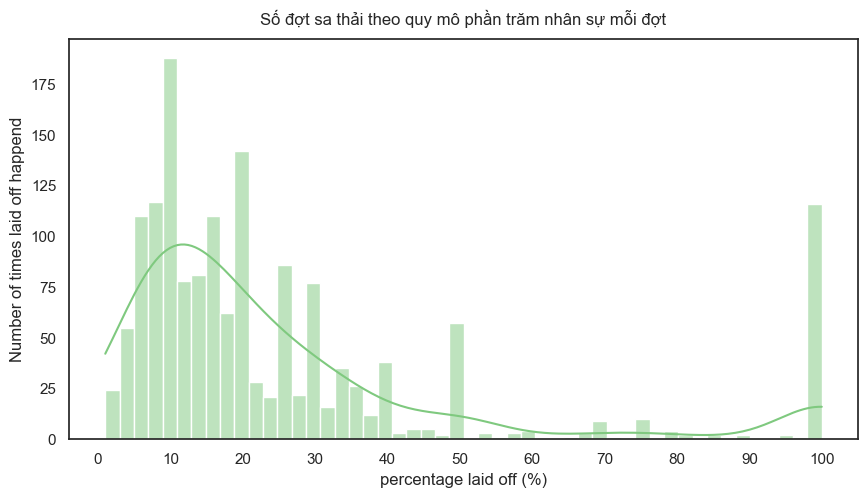

In [57]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
fig.tight_layout(pad=5.0)
ax.set_xticks(np.arange(0, 101, 10))
ax.set_title( 'Số đợt sa thải theo quy mô phần trăm nhân sự mỗi đợt',wrap=True,pad=10)
ax.set_xlabel('percentage laid off (%)')
ax.set_ylabel('Number of times laid off happend')
sns.histplot(df_clean_percentage['percentage_laid_off'], kde=True, bins=50)

Ta thấy biểu đồ có 2 đỉnh. Đỉnh lớn nằm quanh 10% cho ta nhận định với mỗi đợt sa thải thì khoảng 10% nhân sự là con số ưu thích của các công ty. Biểu đồ lệch trái cho thấy các công ty có xu hướng luôn có gắng để sa thải ít hơn 50% nhân sự mỗi đợt. Điều thú vị khác là đỉnh thứ 2 nằm ở mức 100%. Điều này có thể liên quan đến các công ty quy nhỏ, toàn bộ các thành viên gắng kết với nhau đến những giây phút cuối cùng ?!?

### <a id='toc1_2_3_'></a>[Top 20 công ty có tổng % số lượng nhân sự bị sa thải nhiều nhất](#toc0_)

C:\Users\St3phen\AppData\Local\Temp\ipykernel_11112\2973131777.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(72.375, 0.5, 'Company')

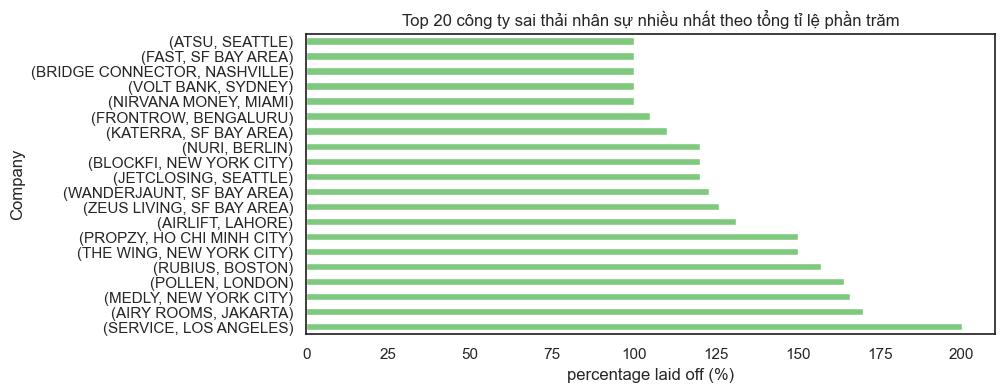

In [58]:
fig, ax = plt.subplots( figsize=(9, 5), tight_layout=True)
fig.tight_layout(pad=5.0)
top_20 = df.groupby(['company','location']).sum().sort_values(by='percentage_laid_off',ascending=False).head(20)['percentage_laid_off'] * 100.0
top_20.plot(kind='barh',ax=ax)
ax.set_title('Top 20 công ty sai thải nhân sự nhiều nhất theo tổng tỉ lệ phần trăm')
ax.set_xlabel('percentage laid off (%)')
ax.set_ylabel('Company')

Ta có thể thấy là có nhiều công ty sa thải với tổng hơn cả 100% nhân sự. Nguyên do là vì họ đã sa thải- tuyển lại và tiếp tục sa thải tiếp trong nhiều đợt . Một ví dụ là công ty `Air rooms`, ngày 2020-04-22 họ sa thải 70% nhân sự và sau đó vào ngày 2020-05-07 họ tiếp tục sa thải toàn bộ 100% nhân sự. Cá biệt có công ty `Service` trụ sở tại Los Angeles đã sai thải 2 lần với quy mô mỗi lần là 100% nhân sự chỉ cách nhau vài ngày 💀.

In [59]:
print(df[df.company=='AIRY ROOMS'])
print(df[df.company=='SERVICE'])

       company location industry  total_laid_off  percentage_laid_off  \
44  AIRY ROOMS  JAKARTA   TRAVEL             0.0                  1.0   
45  AIRY ROOMS  JAKARTA   TRAVEL             0.0                  0.7   

         date    stage    country  funds_raised sector  
44 2020-05-07  UNKNOWN  INDONESIA           0.0    NaN  
45 2020-04-22  UNKNOWN  INDONESIA           0.0    NaN  
      company     location industry  total_laid_off  percentage_laid_off  \
1487  SERVICE  LOS ANGELES   TRAVEL             0.0                  1.0   
1488  SERVICE  LOS ANGELES   TRAVEL             0.0                  1.0   

           date stage        country  funds_raised sector  
1487 2020-03-16  SEED  UNITED STATES           5.1    NaN  
1488 2020-03-20  SEED  UNITED STATES           5.0    NaN  


### <a id='toc1_2_4_'></a>[Tìm hiểu về các công ty sa thải hơn 50% nhân sự trong các đợt](#toc0_)

In [60]:
more_than_50percent_laid_off=df_clean_percentage[df_clean_percentage.percentage_laid_off>=50]
# số lần sa thải có quy mô > 50% nhân viên
n_more_than_50percent_laid_off=more_than_50percent_laid_off.shape[0]

# số lần sa thải có quy mô 100% nhân viên
laid_off_all_employees =df_clean_percentage[df_clean_percentage.percentage_laid_off==100]
n_laid_off_all_employees = laid_off_all_employees.shape[0]
print("Tổng số đợt sa thải >50% nhân sự: "+str(n_more_than_50percent_laid_off))
print("Tổng số đợt sa thải 100% nhân sự: "+str(n_laid_off_all_employees))

Tổng số đợt sa thải >50% nhân sự: 220
Tổng số đợt sa thải 100% nhân sự: 116


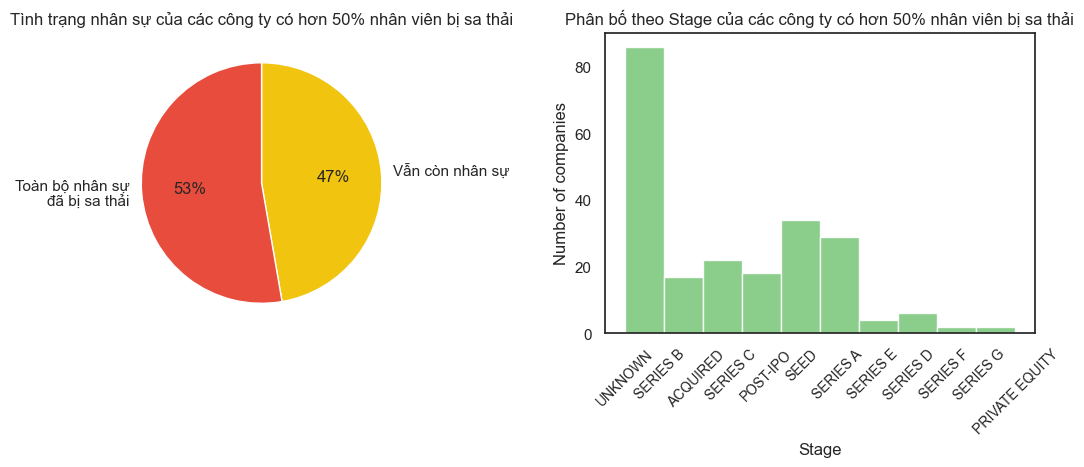

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
fig.tight_layout(pad=5.0)
#pie chart
pie_lb=['\n'.join(wrap('Vẫn còn nhân sự', 15)),'\n'.join(wrap('Toàn bộ nhân sự đã bị sa thải', 15))]
ax1.pie([n_more_than_50percent_laid_off-n_laid_off_all_employees,n_laid_off_all_employees],labels=pie_lb,autopct='%.0f%%',counterclock=False, startangle=-270,colors=['#F1C40F','#E74C3C'])
ax1.set_title('Tình trạng nhân sự của các công ty có hơn 50% nhân viên bị sa thải',wrap=True)

#histogram
ax2.hist(more_than_50percent_laid_off['stage'],alpha=0.9)
plt.xticks(rotation=45, size=10)
ax2.set_xlabel('Stage')
ax2.set_ylabel('Number of companies')
ax2.set_title('Phân bố theo Stage của các công ty có hơn 50% nhân viên bị sa thải',wrap=True)
plt.show()

Dựa vào biểu đồ tròn ta thấy rằng, một khi đã sa thải hơn 50% nhân sự thì có tới hơn 53% đó sẽ là những lần sa thải toàn bộ 100% nhân sự. 
Nhìn vào biểu đồ histogram ta thấy rằng đa số những công ty thuộc nhóm ra thải nhiều này chủ yếu không có thông tin về `stage` hoặc thuộc những giai đoạn khởi đầu (`Seed`, `SeriesA`...). Những công ty này thiếu sự ổn định.

### <a id='toc1_2_5_'></a>[Tìm hiểu quan hệ giữa total_laid_off,percentage_laid_off,funds_raised,total_employees](#toc0_)

In [62]:
# xữ lý các dòng có giá trị 0
df_cor=df_with_total_employees[(df_with_total_employees != 0).all(1)]
df_cor.reset_index(drop=True)

# lấy 4 cột 'total_laid_off','percentage_laid_off','funds_raised','total_employees' để so sánh correlation
df_cor=df_cor.loc[:,['total_laid_off','percentage_laid_off','funds_raised','total_employees']]
df_cor.shape[0]

1088

<Axes: >

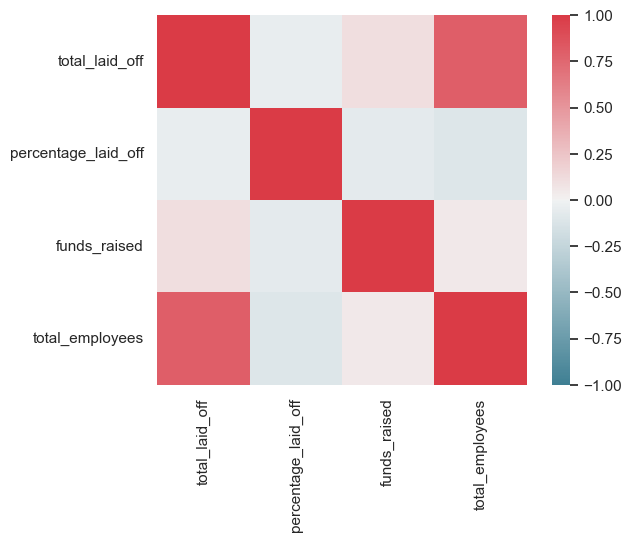

In [63]:
# vẽ correlation map
corr = df_cor.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True)

Ta thấy rằng `total_employees` và `total_laid_off` có quan hệ phụ thuộc mạnh còn các cặp feature còn lại gần như không có quan hệ.